### WeatherPy
----

#### This analysis will use Python scripting to visualize the weather of 600+ cities around the world with varying distances from the equator. The script will make external calls to the OpenWeatherMap API.

### Outcomes: Build a series of visualizations (scatter plots) to show the following relationships:

   ####    Temperature (F) vs. Latitude
   ####    Humidity (%) vs. Latitude
   ####    Cloudiness (%) vs. Latitude
   ####    Wind Speed (mph) vs. Latitude
    
### Framework :

  ####    Python Requests
  ####    APIs
  ###    JSON Traversals
    
### Analysis:

#### The weather becomes significantly warmer the closer we get to the equator (0 Degrees Latitude). On 4/13/2020, the southern hemisphere tends to be warmer than the northern hemisphere. 


#### Humidity in cities within a range of +/- 19 degrees of the equator appear to be consistently more humid. That said, the relationship between Latitude and Humidity is weak. High and Low humidity appear randomly in both hemispheres outside of the +/- 19 degree range.


#### There is no strong relationship between latitude and cloudiness. 


#### There is no strong relationship between latitude and wind speed. However, in the northern hemisphere, there are a few cities that have above average (20 mph) windspeeds.  



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#print (weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Create Northern and Southern Hemisphere DataFrames

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#OpenWeather API URL...
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up the query URL and make the request
weatherAPI_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="
weatherAPI_response = requests.get(weatherAPI_url + cities[2])
#if weatherAPI_response.status_code == 200:
#    print("yes")

print("Beginning Data Retrival")
print("------------------------------")
group_counter = 1
rec_counter = 1

weather_data = {"City":[],"Lat":[],"Lng":[],"Max Temp":[],"Humidity":[],"Cloudiness":[],
                "Wind Speed":[],"Country":[],"Date":[]}

for city in cities:
    weatherAPI_response = requests.get(weatherAPI_url + city)
    weatherAPI_response_json = weatherAPI_response.json()
    
    if weatherAPI_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weatherAPI_response_json['clouds']['all'])
        weather_data["Country"].append(weatherAPI_response_json['sys']['country'])
        weather_data["Date"].append(weatherAPI_response_json['dt'])
        weather_data["Humidity"].append(weatherAPI_response_json['main']['humidity'])
        weather_data["Lat"].append(weatherAPI_response_json['coord']['lat'])
        weather_data["Lng"].append(weatherAPI_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weatherAPI_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weatherAPI_response_json['wind']['speed'])
        if rec_counter <= 50:
            print(f"Processing Record {rec_counter} of Set {group_counter} | {city}")
            rec_counter += 1 
        else:
            rec_counter = 0
            group_counter += 1
            print(f"Processing Record {rec_counter} of Set {group_counter} | {city}")
            rec_counter += 1
    else:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
      

Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | krasnoselkup
Processing Record 2 of Set 1 | sinnamary
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 7 of Set 1 | quesnel
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | kiama
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | kemin
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | sorong
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | thomasville
Processing Record 19 of Set 1 | umba
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | ngora
Processing Record 22 of Set 1 | alofi
Processing Record 23 of Set 1

Processing Record 36 of Set 4 | negombo
Processing Record 37 of Set 4 | auki
Processing Record 38 of Set 4 | maceio
Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | bam
Processing Record 42 of Set 4 | camacha
Processing Record 43 of Set 4 | kalevala
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | babstovo
Processing Record 46 of Set 4 | majene
Processing Record 47 of Set 4 | montlucon
Processing Record 48 of Set 4 | pacific grove
Processing Record 49 of Set 4 | xam nua
Processing Record 50 of Set 4 | inuvik
Processing Record 0 of Set 5 | port hedland
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | hvolsvollur
Processing Record 3 of Set 5 | great falls
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | dunedin
City not found. Skipping...
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | escarcega
Processing Record

Processing Record 21 of Set 8 | buraydah
Processing Record 22 of Set 8 | dubbo
Processing Record 23 of Set 8 | padang
Processing Record 24 of Set 8 | boa vista
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 8 | zanesville
Processing Record 26 of Set 8 | okhotsk
Processing Record 27 of Set 8 | buchanan
Processing Record 28 of Set 8 | hobyo
Processing Record 29 of Set 8 | magaria
Processing Record 30 of Set 8 | oktyabrskoye
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | balclutha
Processing Record 33 of Set 8 | kuopio
Processing Record 34 of Set 8 | meridian
Processing Record 35 of Set 8 | sturgis
Processing Record 36 of Set 8 | staunton
Processing Record 37 of Set 8 | newport
Processing Record 38 of Set 8 | kayes
Processing Record 39 of Set 8 | omsukchan
Processing Record 40 of Set 8 | casselman
Processing Record 41 of Set 8 | tigil
Processing Record 42 of Set 8 | launceston
City not found. Skipping...
Processing Record

Processing Record 2 of Set 12 | gamba
Processing Record 3 of Set 12 | ginir
Processing Record 4 of Set 12 | meulaboh
Processing Record 5 of Set 12 | itaqui
Processing Record 6 of Set 12 | uyuni
Processing Record 7 of Set 12 | nagykoros
Processing Record 8 of Set 12 | dire
Processing Record 9 of Set 12 | tuburan
Processing Record 10 of Set 12 | baneh
Processing Record 11 of Set 12 | takhtamygda
Processing Record 12 of Set 12 | rizhao
Processing Record 13 of Set 12 | carauari
Processing Record 14 of Set 12 | khani
Processing Record 15 of Set 12 | toucheng
-------------------------
Data Retrieval Complete
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,krasnoselkup,65.70,82.47,35.62,98,100,17.29,RU,1587170809
1,sinnamary,5.38,-52.95,79.66,83,75,12.86,GF,1587170809
2,hasaki,35.73,140.83,57.20,93,75,16.11,JP,1587170809
3,anadyr,64.75,177.48,15.01,85,90,4.47,RU,1587170810
4,hilo,19.73,-155.09,80.60,54,75,10.29,US,1587170652


In [6]:
# Exporting the city data into csv
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
over100_df = weather_df[weather_df['Humidity'] > 100]
print (over100_df) 

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [8]:
#  Get the indices of cities that have humidity over 100%.
# N/A

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# N/A - 
#weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace = False)

In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

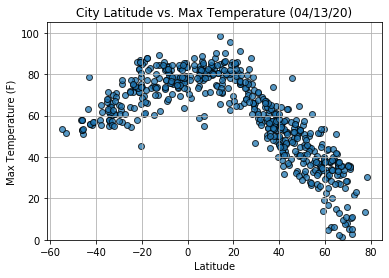

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (04/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("LatVsTemp.png")
plt.show()


# The weather becomes significantly warmer the closer we get to the equator (0 Degrees Latitude). 
# On 4/13/2020, the southern hemisphere tends to be warmer than the northern hemisphere. 

## Latitude vs. Humidity Plot

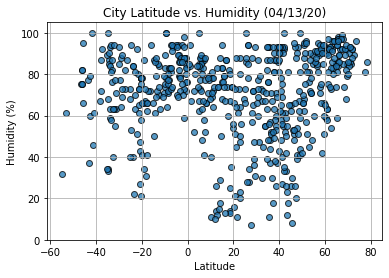

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Humidity (04/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("LatVsHum.png")
plt.show()


# Humidity in cities within a range of +/- 19 degrees of the equator appear to be consistently more humid. That said, the 
# relationship between Latitude and Humidity is weak. High and Low humidity appear randomly in both hemispheres outside of the
# +/- 19 degree range.

## Latitude vs. Cloudiness Plot

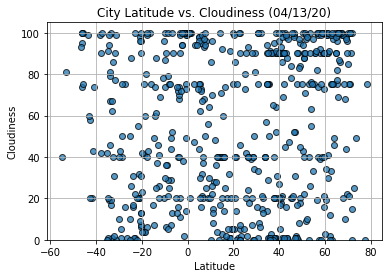

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (04/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("LatVsCloud.png")
plt.show()

# There is no strong relationship between latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

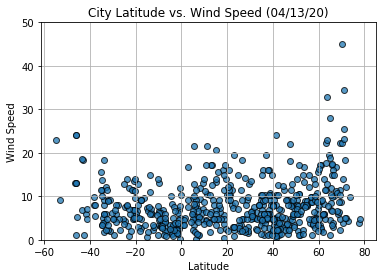

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (04/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(0,50)
plt.grid(True)

plt.savefig("LatVsWndspd.png")
plt.show()

# There is no strong relationship between latitude and wind speed. However, in the northern hemisphere, 
# there are a few cities that have above average (20 mph) windspeeds.  

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.96x + 91.49
The r-squared is: -0.8935826952260835
Strong relationship with Temp and Latitude: Temperature decreases the further north (- lat) you go from the equator.


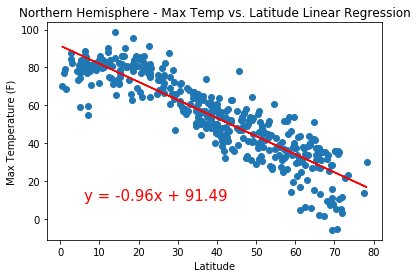

In [25]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("Strong relationship with Temp and Latitude: Temperature decreases the further north (- lat) you go from the equator.")
plt.show()

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.52x + 81.76
The r-squared is: 0.7129106240836492
The regression displays a positive correlation.
Strong relationship with Temp and Latitude: Temperature increases the further south (+lat) you go toward the equator.


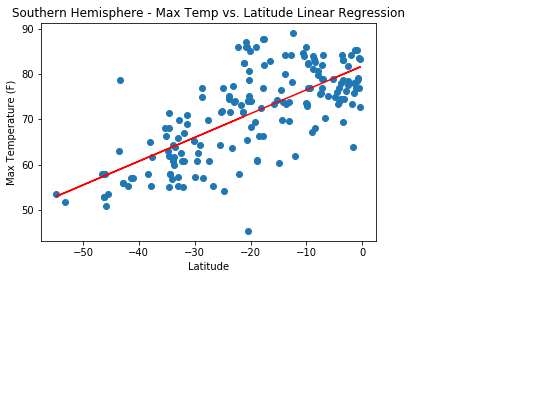

In [33]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("Strong relationship with Temp and Latitude: Temperature increases the further south (+lat) you go toward the equator.")
plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.32x + 57.03
The r-squared is: 0.2837123385964743
The regression does not display much of a correlation between the data sets.


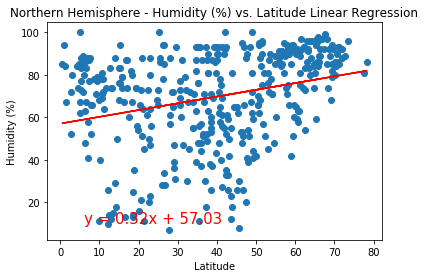

In [29]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("This regression suggests a weak correlation between the Latitude and Humidity.") 
plt.show()

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.31x + 79.79
The r-squared is: 0.24848287626119786
This regression suggests a weak correlation between the Latitude and Humidity.


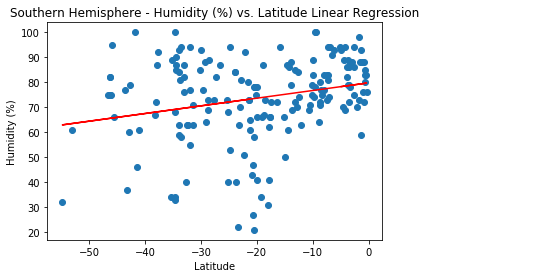

In [31]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("This regression suggests a weak correlation between the Latitude and Humidity.")
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 38.83
The r-squared is: 0.2206935143270898
This regression suggests a weak correlation between the Latitude and Cloudiness.


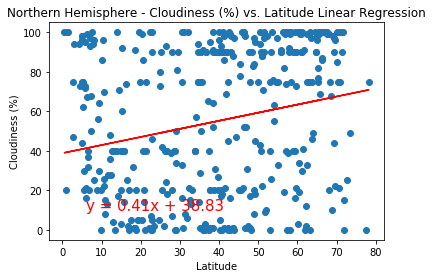

In [36]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("This regression suggests a weak correlation between the Latitude and Cloudiness.")
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 55.33
The r-squared is: 0.05301185160528109
This regression suggests a weak correlation between the Latitude and Cloudiness.


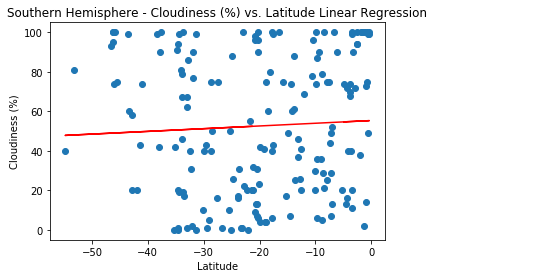

In [37]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("This regression suggests a weak correlation between the Latitude and Cloudiness.")
plt.show()

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 6.15
The r-squared is: 0.17161994782682094
This regression suggests a weak correlation between the Latitude and Wind Speed.


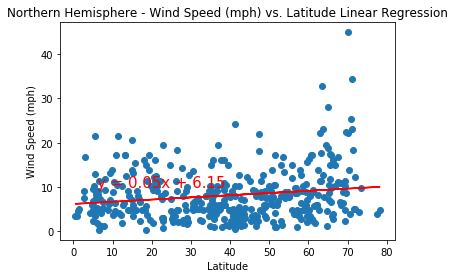

In [39]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("This regression suggests a weak correlation between the Latitude and Wind Speed.")
plt.show()

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 3.52
The r-squared is: -0.4424186686783355
This regression suggests a weak correlation between the Latitude and Wind Speed.


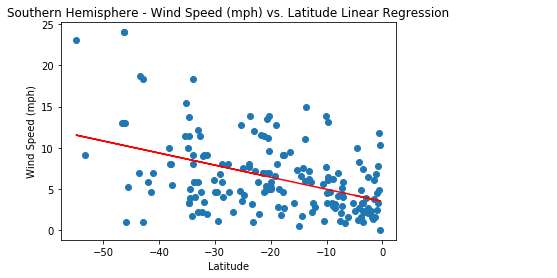

In [40]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("This regression suggests a weak correlation between the Latitude and Wind Speed.")
plt.show()